In [42]:
import os
import psycopg2
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'tahoma'


In [ ]:
# Load environment variables from .env file
load_dotenv()

# Retrieve environment variables
host = os.getenv("HOST")
port = os.getenv("PORT")
database = os.getenv("DATABASE")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASS")

# Construct the connection string
connection_string = f"host={host} port={port} dbname={database} user={user} password={password}"

In [7]:
# Connect to the PostgreSQL database
try:
    connection = psycopg2.connect(connection_string)
    cursor = connection.cursor()
    print("Connected to the PostgreSQL database!")

    # Execute queries
    query = "SELECT * FROM cons_by_district;"
    cursor.execute(query)
    raw_data = cursor.fetchall()

    # Don't forget to close the cursor and connection when done
    cursor.close()
    connection.close()

except psycopg2.Error as e:
    print("Error connecting to the database:", e)

Connected to the PostgreSQL database!


In [10]:
# Convert fetched data into df
column_names = [desc[0] for desc in cursor.description]
df = pd.DataFrame(raw_data, columns=column_names)
df

,id,province_code,province_name,amphur_code,amphur_name,class_group_code,class_group_name,consumption,YYMM,status
0,1,10,กรุงเทพมหานคร,1,พระนคร,1,RESIDENCE,168906,6501,1
1,2,10,กรุงเทพมหานคร,1,พระนคร,2,BUSINESS,249666,6501,1
2,3,10,กรุงเทพมหานคร,1,พระนคร,3,INDUSTRY,7204,6501,1
3,4,10,กรุงเทพมหานคร,1,พระนคร,4,ENTERTAIN,38717,6501,1
4,5,10,กรุงเทพมหานคร,1,พระนคร,5,GOVERNMENT,47321,6501,1
...,...,...,...,...,...,...,...,...,...,...
10760,12339,10,กรุงเทพมหานคร,14,พญาไท,1,RESIDENCE,614070,6412,1
10761,12311,10,กรุงเทพมหานคร,10,มีนบุรี,3,INDUSTRY,289923,6412,1
10762,12308,10,กรุงเทพมหานคร,9,พระโขนง,8,MWA,0,6412,1
10763,12276,10,กรุงเทพมหานคร,5,บางเขน,7,CONSTRUCT,53512,6412,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10765 entries, 0 to 10764
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                10765 non-null  int64 
 1   province_code     10590 non-null  object
 2   province_name     10590 non-null  object
 3   amphur_code       10590 non-null  object
 4   amphur_name       10569 non-null  object
 5   class_group_code  10765 non-null  object
 6   class_group_name  10765 non-null  object
 7   consumption       10765 non-null  int64 
 8   YYMM              10765 non-null  object
 9   status            10765 non-null  object
dtypes: int64(2), object(8)
memory usage: 841.1+ KB


In [12]:
df.describe()

,id,consumption
count,10765.000000,1.076500e+04
mean,6184.472550,2.284146e+05
std,3945.290122,4.232059e+05
min,1.000000,0.000000e+00
25%,2692.000000,1.077000e+04
50%,5383.000000,4.374900e+04
75%,10038.000000,2.547960e+05
max,12729.000000,4.293764e+06


In [23]:
print(df['class_group_code'].unique())
print(df['class_group_name'].unique())

['1' '2' '3' '4' '5' '6' '7' '8']
['RESIDENCE' 'BUSINESS' 'INDUSTRY' 'ENTERTAIN' 'GOVERNMENT' 'INSTITUTION'
 'CONSTRUCT' 'MWA']


In [29]:
print(df['province_code'].value_counts())
print(df['province_name'].value_counts())

10    8336
11    1035
12    1012
13     110
24      66
73      22
         9
Name: province_code, dtype: int64
กรุงเทพมหานคร    8336
สมุทรปราการ      1035
นนทบุรี          1012
ปทุมธานี          110
ฉะเชิงเทรา         66
นครปฐม             22
                    9
Name: province_name, dtype: int64


In [30]:
# print(df['amphur_code'].value_counts())
print(df['amphur_name'].value_counts())

บางซื่อ     176
หลักสี่     176
บางกรวย     176
จตุจักร     176
ประเวศ      176
           ... 
สายไหม      132
ลำลูกกา     110
บางปะกง      66
พุทธมณฑล     22
             10
Name: amphur_name, Length: 66, dtype: int64


In [90]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects.patches:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

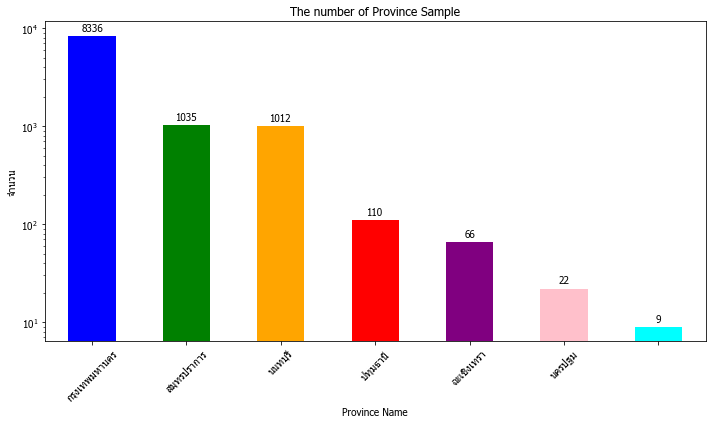

In [92]:
fig, ax = plt.subplots(figsize=(10, 6))
pv_name = df['province_name'].unique()
pv_counts= df['province_name'].value_counts()
bar_colors = ['blue', 'green', 'orange', 'red', 'purple', 'pink', 'cyan']
bars = pv_counts.plot(kind='bar',color=bar_colors)
autolabel(bars)
plt.title('The number of Province Sample')
plt.xlabel('Province Name')
plt.ylabel('จำนวน')
plt.xticks(rotation=45)
plt.yscale('log')
plt.tight_layout()

plt.show()

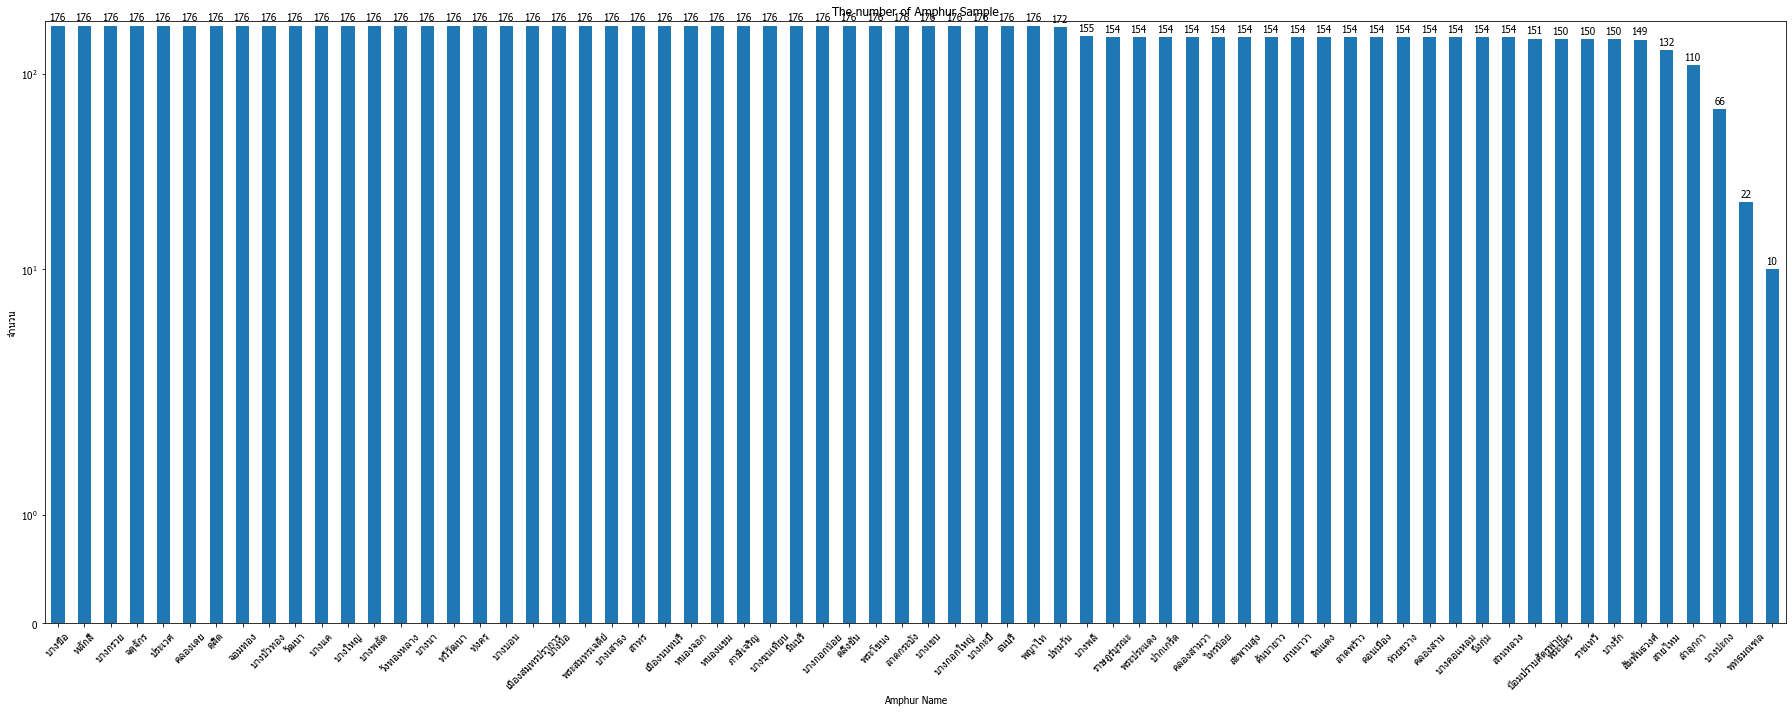

In [102]:
fig, ax = plt.subplots(figsize=(25, 10))
pv_name = df['amphur_name'].unique()
pv_counts= df['amphur_name'].value_counts()
# bar_colors = ['blue', 'green', 'orange', 'red', 'purple', 'pink', 'cyan']
bars = pv_counts.plot(kind='bar')
autolabel(bars)
plt.title('The number of Amphur Sample')
plt.xlabel('Amphur Name')
plt.ylabel('จำนวน')
plt.xticks(rotation=45)
plt.yscale('symlog')
plt.tight_layout()

plt.show()